In [2]:
from google.colab import files
uploaded = files.upload()

Saving ptbxl_database.csv to ptbxl_database.csv


In [3]:
from google.colab import files
uploaded = files.upload()

Saving scp_statements.csv to scp_statements.csv


In [4]:
from google.colab import files
uploaded = files.upload()

Saving Lab Session Data.xlsx to Lab Session Data.xlsx


In [5]:
from google.colab import files
uploaded = files.upload()

Saving 01000_lr.dat to 01000_lr.dat
Saving 01000_lr.hea to 01000_lr.hea
Saving 01001_lr.dat to 01001_lr.dat


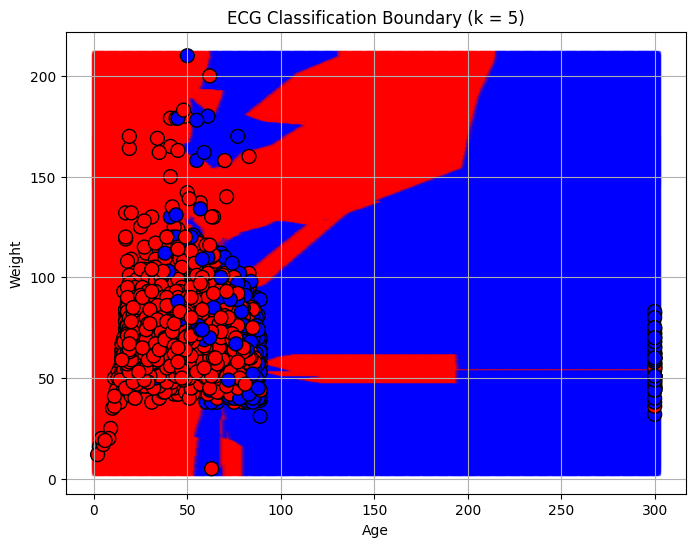

In [24]:
#A6
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import ast

# ---------------- Function 1: Load and Filter ECG Data ----------------
def load_ecg_data(ptbxl_path="ptbxl_database.csv", scp_path="scp_statements.csv"):
    df = pd.read_csv(ptbxl_path)
    scp = pd.read_csv(scp_path)

    # Identify diagnostic codes
    diagnostic_codes = scp[scp["diagnostic"] == 1.0]["Unnamed: 0"].tolist()

    # Parse scp_codes
    df["scp_codes"] = df["scp_codes"].apply(ast.literal_eval)
    df["diagnostic_codes"] = df["scp_codes"].apply(lambda x: [code for code in x if code in diagnostic_codes])

    # Label as NORM or MI
    mi_codes = ['IMI', 'ASMI', 'AMI', 'ALMI', 'ILMI']
    def assign_label(codes):
        if "NORM" in codes:
            return "NORM"
        elif any(code in mi_codes for code in codes):
            return "MI"
        return None

    df["label"] = df["diagnostic_codes"].apply(assign_label)
    df = df.dropna(subset=["label", "age", "weight"])
    return df[["age", "weight", "label"]]
# ---------------- Function 2: Prepare training and test set ----------------
def prepare_data(df, test_step=0.5):
    X_train = df[["age", "weight"]].values
    y_train = LabelEncoder().fit_transform(df["label"].values)

    x_min, x_max = X_train[:, 0].min() - 2, X_train[:, 0].max() + 2
    y_min, y_max = X_train[:, 1].min() - 2, X_train[:, 1].max() + 2

    xx, yy = np.meshgrid(np.arange(x_min, x_max, test_step),
                         np.arange(y_min, y_max, test_step))
    X_test = np.c_[xx.ravel(), yy.ravel()]

    return X_train, y_train, X_test, xx, yy
# ---------------- Function 3: Train and predict ----------------
def knn_predict(X_train, y_train, X_test, k):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    return model.predict(X_test)
# ---------------- Function 4: Plot classification boundary ----------------
def plot_boundary(X_train, y_train, X_test, y_pred, k, title=""):
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test[:, 0], X_test[:, 1], c=np.where(y_pred == 0, 'blue', 'red'), s=10, alpha=0.3, marker='s')
    plt.scatter(X_train[:, 0], X_train[:, 1], c=np.where(y_train == 0, 'blue', 'red'), s=100, edgecolor='black')
    plt.title(f"{title} (k = {k})")
    plt.xlabel("Age")
    plt.ylabel("Weight")
    plt.grid(True)
    plt.show()

# ---------------- Main execution block ----------------
if __name__ == "__main__":
    # Load and prepare data
    ecg_df = load_ecg_data()
    X_train, y_train, X_test, xx, yy = prepare_data(ecg_df)

    # Choose k (example: k=5)
    k_value = 5

    # Train and predict
    y_pred_test = knn_predict(X_train, y_train, X_test, k_value)

    # Plot the classification boundary
    plot_boundary(X_train, y_train, X_test, y_pred_test, k_value, title="ECG Classification Boundary")